In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
ta = pd.read_csv("Tel_Aviv.csv")

In [3]:
ta.head(10)

,datetime,pressure,humidity,temperature,weather,wind direction,wind speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,sky is not clear,NaN,NaN
1,2012-10-01 13:00:00,1012.0,63.0,305.470000,sky is clear,0.0,0.0
2,2012-10-01 14:00:00,1012.0,62.0,304.310000,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,1012.0,62.0,304.281841,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,1012.0,62.0,304.238015,sky is clear,0.0,0.0
5,2012-10-01 17:00:00,1012.0,62.0,304.194188,sky is clear,0.0,0.0
6,2012-10-01 18:00:00,1012.0,63.0,304.150361,sky is clear,0.0,0.0
7,2012-10-01 19:00:00,1012.0,63.0,304.106534,sky is clear,0.0,1.0
8,2012-10-01 20:00:00,1012.0,63.0,304.062708,sky is clear,0.0,1.0
9,2012-10-01 21:00:00,1012.0,64.0,304.018881,sky is clear,0.0,1.0


In [4]:
ta.drop(['humidity', 'temperature', 'weather', 'wind direction', 'wind speed'], axis = 1, inplace = True)

In [5]:
ta.rename(columns = {'datetime': 'ds', 'pressure': 'y'}, inplace = True)
ta.head()

,ds,y
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [6]:
ta.tail()

,ds,y
45248,2017-11-29 20:00:00,NaN
45249,2017-11-29 21:00:00,NaN
45250,2017-11-29 22:00:00,NaN
45251,2017-11-29 23:00:00,NaN
45252,2017-11-30 00:00:00,NaN


In [7]:
ta['ds'] = pd.to_datetime(ta['ds'])

In [8]:
ta.head()

,ds,y
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [9]:
ta.columns

Index(['ds', 'y'], dtype='object')

In [10]:
model = Prophet()
model.fit(ta)

Initial log joint probability = -2.99109
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        215343   0.000961594         98030       0.455           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        215809   0.000439384       13102.2           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        216049   0.000632239       57703.9      0.2821           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        216380    0.00114322       55386.8           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        216512   4.23894e-05       7182.92           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

   216546   0.000128679       18500.5      0.3055      0.3055      698   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699        216734     0.0131763       55962.9           1           1      815   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799        216787   0.000114478       11878.1           1           1      925   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899        216848    0.00186748        177228      0.0744           1     1039   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999        216879   2.99388e-05       10180.4      0.8484      0.8484     1149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099        216912   0.000105519       9338.17           1           1     1261   
    Iter      log prob        |

In [11]:
# forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [12]:
# model.plot(forecast)
# plt.show()

In [13]:
from dateutil import rrule
from datetime import datetime, timedelta

now = datetime(2017, 12, 1, 1, 0, 0)
daysLater = now + timedelta(days=1825)

future_dates = []
for dt in rrule.rrule(rrule.HOURLY, dtstart=now, until=daysLater):
    future_dates.append(dt)
future_dates = pd.DataFrame(future_dates)
future_dates.columns = ['ds']
future_dates['ds'] = pd.to_datetime(future_dates['ds'])

forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43796,2022-11-29 21:00:00,1031.466296,486.982125,1543.384252
43797,2022-11-29 22:00:00,1031.389194,488.255234,1537.757277
43798,2022-11-29 23:00:00,1031.257105,488.835063,1542.799195
43799,2022-11-30 00:00:00,1031.088821,488.636777,1538.278701
43800,2022-11-30 01:00:00,1030.921409,489.929854,1536.937160


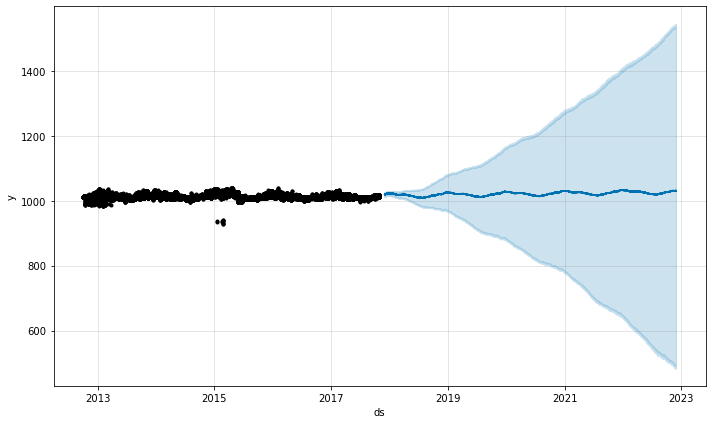

In [14]:
model.plot(forecast)
plt.show()

In [15]:
forecast = forecast[['ds', 'yhat']]
forecast['yhat'] = forecast['yhat'].round(1)
print(forecast)

                       ds    yhat
0     2017-12-01 01:00:00  1018.6
1     2017-12-01 02:00:00  1018.5
2     2017-12-01 03:00:00  1018.5
3     2017-12-01 04:00:00  1018.7
4     2017-12-01 05:00:00  1019.0
...                   ...     ...
43796 2022-11-29 21:00:00  1031.5
43797 2022-11-29 22:00:00  1031.4
43798 2022-11-29 23:00:00  1031.3
43799 2022-11-30 00:00:00  1031.1
43800 2022-11-30 01:00:00  1030.9

[43801 rows x 2 columns]


In [16]:
compression_opts = dict(method = 'zip', archive_name = 'Pressure.csv')  
forecast.to_csv('Pressure.zip', index = False, compression = compression_opts)